In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ase.io.gaussian import read_gaussian_out
sns.set()
sns.set_context("talk")

In [2]:
results = pd.read_csv("hotbit.csv")
results = results[["index", "hotbit"]]
results

,index,hotbit
0,0,-63.885424
1,1,-63.877524
2,2,-63.875763
3,3,-63.848297
4,4,-63.838570
5,5,-63.837772
6,6,-63.833525
7,7,-63.830071
8,8,-63.826004
9,9,-63.820644


In [11]:
smiles = "COC=CO"
directory = "species/{}/conformers".format(smiles)
files = [f for f in os.listdir(directory) if f.endswith(".log")]
gaussian_results = {}
for fi in files:
    _, index = fi.strip(".log").split("_")
    index = int(index)
    atoms = read_gaussian_out(os.path.join(directory, fi))
    energy = atoms.get_potential_energy()
    gaussian_results[index] = energy
    forces = atoms.get_forces()
    print np.sqrt((forces**2).sum(axis=1).max())
    

3.1491439174355915
3.528945561473359
10.857977888630307
3.4773139250260154
3.632224548909357
10.412267416826523
3.23377397756902
23.388395575191247
10.04206795286546
3.86700109961519
3.9851596115178296
3.0444129170915075
3.6009751426464462
3.8157969675906873
3.918581041436966
23.430084021931187
3.4195080990480613
24.33510230105709
3.9492165349581856
3.5296883078150625
3.201614622974873
20.53417043947692
3.646256264919987
23.13687969520068
3.0437414055372223
3.2020822117043237
2.9738396285600683
3.216987687113523
3.735974986885626
3.242744352498943
3.5257372166252003
2.9868945338737385
3.57734067778919
3.576334549398583


In [4]:
results = results.join(pd.DataFrame(gaussian_results.values(), columns=["gaussian"])) / 0.043

Text(0.5,1,'COC=CO')

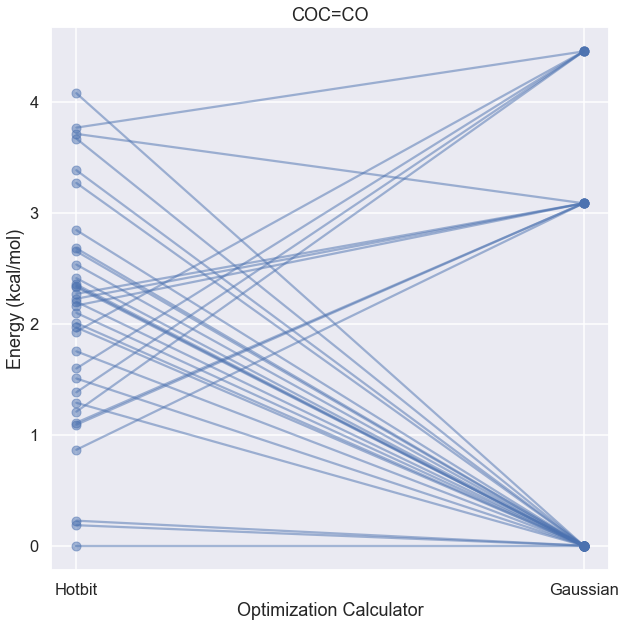

In [5]:
ax = (results - results.min())[["hotbit", "gaussian"]].T.plot(legend=False, c="b", marker="o", alpha=0.5, figsize=(10,10))
#ax.plot([1,1], c="r")
ax.set_xticks([0.0,1.0])
ax.set_xticklabels(["Hotbit", "Gaussian"])
ax.set_ylabel("Energy (kcal/mol)")
ax.set_xlabel("Optimization Calculator")
ax.set_title(smiles)

In [9]:
forces = atoms.get_forces()
(forces**2).sum(axis=1).max()

12.790168809221967